In [4]:
import pandas as pd
from sklearn.svm import SVC

In [5]:
df=pd.read_csv('./loan dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
nullcols=[]
for col in df.columns.tolist():
    if(df[col].isnull().sum() > 0):
        nullcols.append(col)

In [11]:
nullcols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [12]:

for cols in nullcols:
    # df[cols].mode()[0]
    df[cols]=df[cols].fillna(df[cols].mode()[0])
 


In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df1=df.copy()
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df1['Dependents']=df1['Dependents'].replace('3+',3)

In [16]:
sex=df1['Gender'].map({'Male':0,'Female':1})
df1.drop(columns=['Gender'],inplace=True)
df1.insert(1,'Gender',sex)

In [17]:
married=df1['Married'].map({'Yes':0,'No':1})
df1.drop(columns=['Married'],inplace=True)
df1.insert(2,'Married',married)

In [18]:
edu=df1['Education'].map({'Graduate':0,'Not Graduate':1})
df1.drop(columns=['Education'],inplace=True)
df1.insert(3,'Education',edu)

In [19]:
emp=df1['Self_Employed'].map({'Yes':0,'No':1})
df1.drop(columns=['Self_Employed'],inplace=True)
df1.insert(4,'Self_Employed',emp)

In [20]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [21]:
parea=df1['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})
df1.drop(columns=['Property_Area'],inplace=True)
df1.insert(5,'Property_Area',parea)

In [22]:
df1

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,0,1,0,1,1,0,5849,0.0,120.0,360.0,1.0,Y
1,LP001003,0,0,0,1,2,1,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,0,0,0,0,1,0,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,0,0,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,0,1,0,1,1,0,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,1,0,1,2,0,2900,0.0,71.0,360.0,1.0,Y
610,LP002979,0,0,0,1,2,3,4106,0.0,40.0,180.0,1.0,Y
611,LP002983,0,0,0,1,1,1,8072,240.0,253.0,360.0,1.0,Y
612,LP002984,0,0,0,1,1,2,7583,0.0,187.0,360.0,1.0,Y


In [23]:
x=df1.iloc[:,1:12]
x

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,5849,0.0,120.0,360.0,1.0
1,0,0,0,1,2,1,4583,1508.0,128.0,360.0,1.0
2,0,0,0,0,1,0,3000,0.0,66.0,360.0,1.0
3,0,0,1,1,1,0,2583,2358.0,120.0,360.0,1.0
4,0,1,0,1,1,0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,1,2,0,2900,0.0,71.0,360.0,1.0
610,0,0,0,1,2,3,4106,0.0,40.0,180.0,1.0
611,0,0,0,1,1,1,8072,240.0,253.0,360.0,1.0
612,0,0,0,1,1,2,7583,0.0,187.0,360.0,1.0


In [24]:
y=df1[['Loan_Status']]
target=y['Loan_Status'].map({'Y':1,'N':0})
y.insert(1,'target',target)
y=y['target']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: target, Length: 614, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
kfold=LogisticRegression()
train_error=[]
test_error=[]

for i in range(5):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y)
    kfold.fit(xtrain,ytrain)

    ytestP=kfold.predict(xtest)
    ytrainP=kfold.predict(xtrain)

    train_error.append(accuracy_score(ytrain,ytrainP))
    test_error.append(accuracy_score(ytest,ytestP))

print(sum(train_error)/5)
print(sum(test_error)/5)


0.791304347826087
0.8090909090909092


/home/study/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/study/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [27]:
kfold2=SVC()
train_error2=[]
test_error2=[]

for i in range(5):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y)
    kfold2.fit(xtrain,ytrain)

    ytestP=kfold2.predict(xtest)
    ytrainP=kfold2.predict(xtrain)

    train_error2.append(accuracy_score(ytrain,ytrainP))
    test_error2.append(accuracy_score(ytest,ytestP))

print(sum(train_error2)/5)
print(sum(test_error2)/5)

0.6904347826086956
0.6883116883116884


In [36]:
from sklearn.model_selection import cross_val_score ,KFold
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y)

lrmodel=LogisticRegression()
svmmodel=SVC()
kf=KFold(n_splits=5)
score=cross_val_score(lrmodel,x,y,cv=kf)
score2=cross_val_score(svmmodel,x,y,cv=kf)
print(score)
print(score2)

[0.80487805 0.76422764 0.80487805 0.86178862 0.81147541]
[0.67479675 0.68292683 0.70731707 0.69105691 0.68032787]


/home/study/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/study/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pre1=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pre1)
acc1

0.8130081300813008

In [39]:
model2=SVC(probability=True)
model2.fit(x_train,y_train)
y_pre2=model1.predict(x_test)
acc2=accuracy_score(y_test,y_pre2)
acc2

0.8130081300813008

In [33]:
from sklearn.metrics import roc_curve

In [40]:
pred_prob1=model1.predict_proba(x_test)
pred_prob2=model2.predict_proba(x_test)
    

In [41]:
#ROC curve for models

fpr1,tpr1,thresh1=roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2=roc_curve(y_test,pred_prob2[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(x_test))]
p_fpr, p_tpr, p_thresh = roc_curve(y_test, random_probs, pos_label=1)




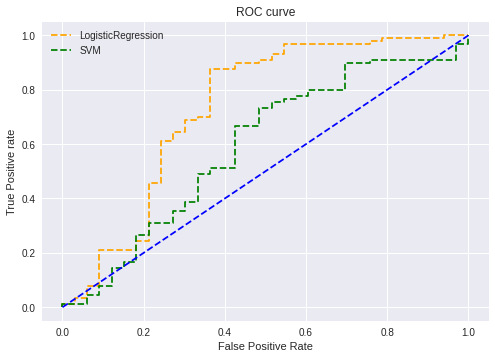

In [46]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')


#plot roc curves

plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='LogisticRegression')
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='SVM')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()